C:\Users\rkmau\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


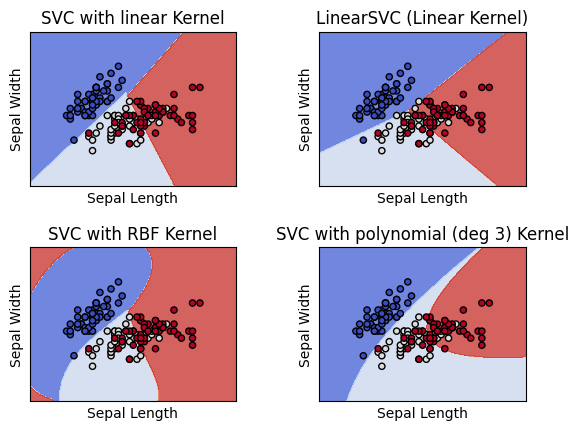

In [1]:
#  SVM Classfier
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

def make_meshgrid(x,y,h=0.02):
    
    x_min, x_max=x.min()-1,x.max()+1
    y_min, y_max=y.min()-1,y.max()+1
    xx,yy=np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))
    return xx,yy

def plot_contours(ax,clf,xx,yy,**params):
    Z=clf.predict(np.c_[xx.ravel(),yy.ravel()])
    Z=Z.reshape(xx.shape)
    out=ax.contourf(xx,yy,Z,**params)
    return out


# import the data
iris=datasets.load_iris()
X=iris.data[:,:2]
y=iris.target

C=1.0 # regularization parameter

models=(
    svm.SVC(kernel="linear",C=C),
    svm.LinearSVC(C=C,max_iter=10000),
    svm.SVC(kernel='rbf',gamma=0.7,C=C),
    svm.SVC(kernel='poly',degree=3, gamma='auto',C=C),
  
)
models=(clf.fit(X,y) for clf in models)

# title of the plots
title=(
    "SVC with linear Kernel",
    "LinearSVC (Linear Kernel)",
    "SVC with RBF Kernel",
    "SVC with polynomial (deg 3) Kernel",
)

# set up 2x2 grid
fig, sub=plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1=X[:,0], X[:,1]
xx, yy=make_meshgrid(X0,X1)

for clf, title, ax in zip(models, title, sub.flatten()):
    plot_contours(ax,clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0,X1,c=y,cmap=plt.cm.coolwarm, s=20, edgecolor='k')
    ax.set_xlim(xx.min(),xx.max())
    ax.set_ylim(yy.min(),yy.max())
    ax.set_xlabel("Sepal Length")
    ax.set_ylabel("Sepal Width")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

    
    
